# In the Name of God
    mohammd mohajel sadegi - 810199483

# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import feature_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Phase1: Exploratory Data Analysis
---

## Raed Dataframe    
read diabetes.csv and save dataframe in patients_info

In [2]:
patients_info = pd.read_csv("diabetes.csv")

## Main Structure Of Data

**head** returns first n columns of dataframe defult number is n = 5.

In [3]:
patients_info.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


by using **describe** we can find statical info about our dataframe like min, max, mean, std, ...

In [4]:
patients_info.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


**info** prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [5]:
patients_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


## Missing Values:

### counting NAN values
in order to coumt NAN values, we use two functions:

**isna()** which returns a boolean same-sized object indicating if the values are NA

**sum()** now if we find sum of *passangers.isna()* we can count number of missing values at each column. 

In [6]:
number_of_misiing_values = patients_info.isna().sum()
print(number_of_misiing_values)

Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


In [7]:
misising_rate = number_of_misiing_values / len(patients_info) * 100
print(misising_rate)

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64


## Correlation:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

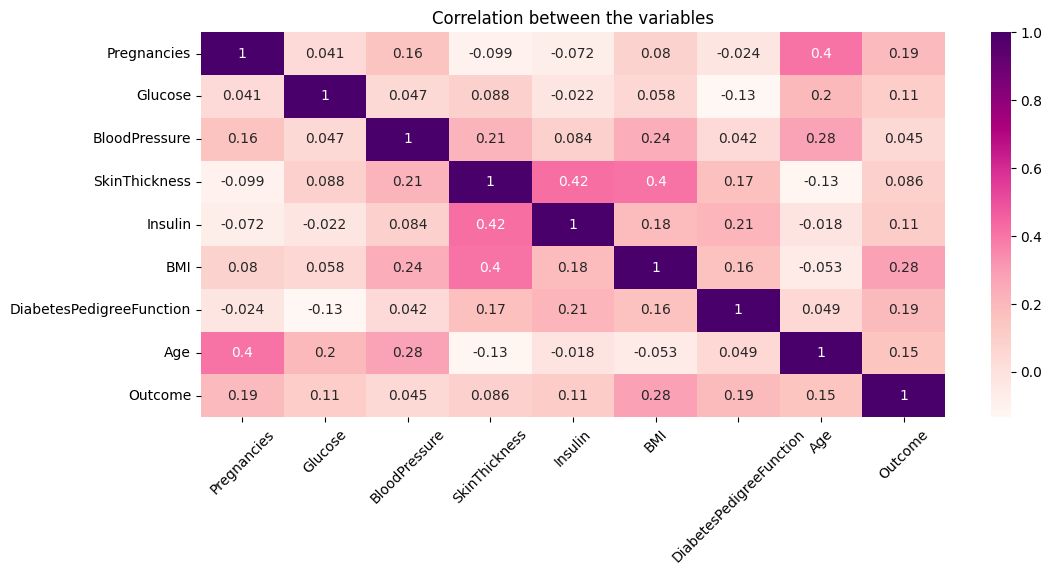

In [8]:
plt.subplots(figsize=(12,5))
corolation = patients_info.corr()
sns.heatmap(corolation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

As you can see, **BMI** has most cortion with outcome

## Plots:

(array([  9.,   0.,  12., 138., 238., 204.,  68.,  11.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

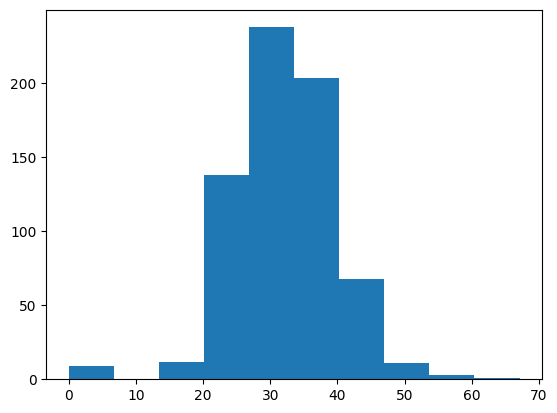

In [9]:
plt.hist(patients_info["BMI"])

 **BMI** has normal like distribution 

(array([  1.,   0.,   0.,   0.,   1., 208., 252., 125.,  45.,   3.]),
 array([-22. , -18.1, -14.2, -10.3,  -6.4,  -2.5,   1.4,   5.3,   9.2,
         13.1,  17. ]),
 <BarContainer object of 10 artists>)

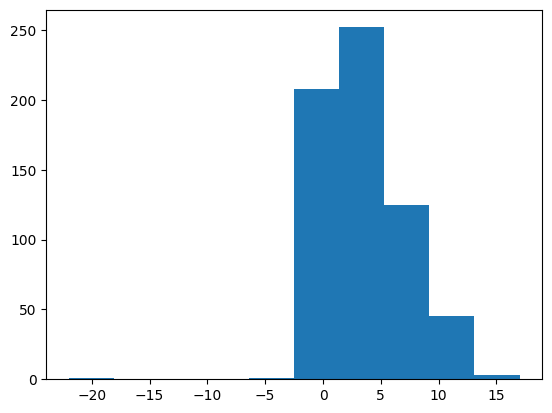

In [10]:
plt.hist(patients_info["Pregnancies"])

(array([241., 154., 108.,  48.,  17.,  13.,   3.,   3.,   1.,   2.]),
 array([0.078 , 0.3031, 0.5282, 0.7533, 0.9784, 1.2035, 1.4286, 1.6537,
        1.8788, 2.1039, 2.329 ]),
 <BarContainer object of 10 artists>)

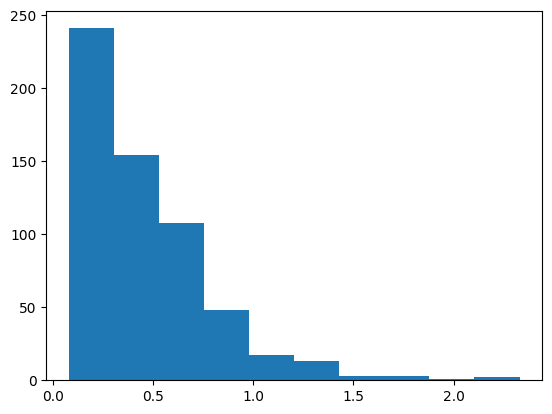

In [11]:
plt.hist(patients_info["DiabetesPedigreeFunction"])

In [12]:
def plot_hexbin(column):
        plt.xlabel(column)
        plt.ylabel("Outcome")
        plt.hexbin(patients_info[column], patients_info["Outcome"], cmap=plt.cm.BuGn_r)

def plot_scatter(column):
        plt.xlabel(column)
        plt.ylabel("Outcome")
        plt.scatter(patients_info[column], patients_info["Outcome"], s=1)

def plot_information(column):
        fig = plt.figure(figsize=(12,4))
        plt.subplot(121)
        plot_hexbin(column)
        plt.subplot(122)
        plot_scatter(column)
        ax = sns.displot(patients_info[column], kde = True)


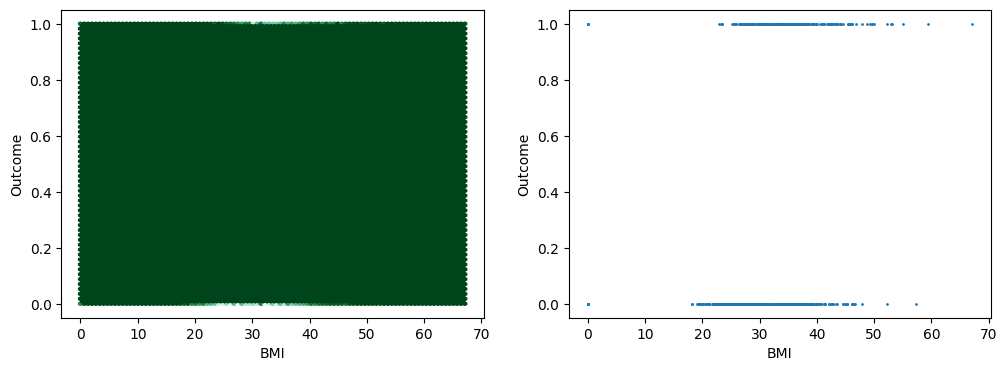

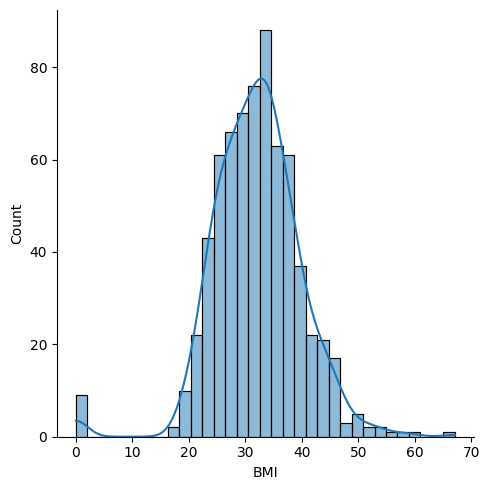

In [13]:
plot_information("BMI")

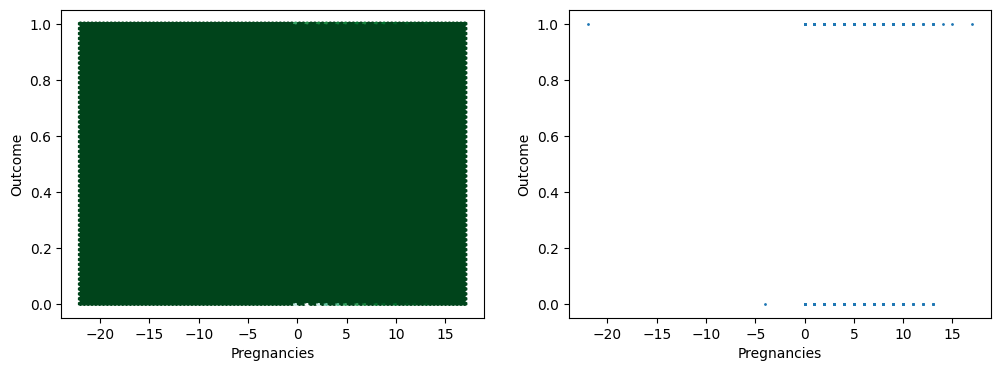

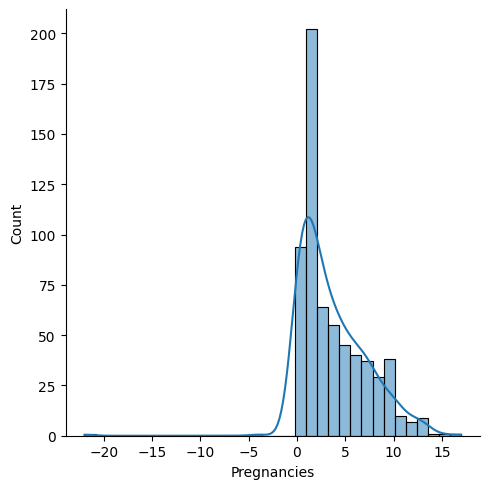

In [14]:
plot_information("Pregnancies")

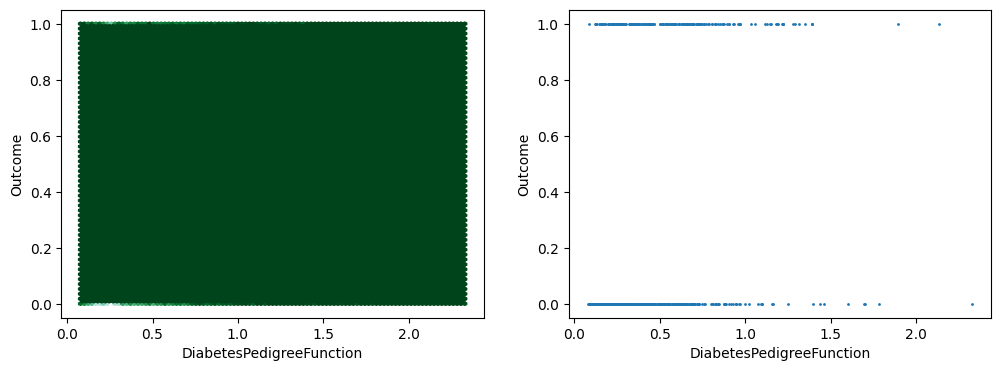

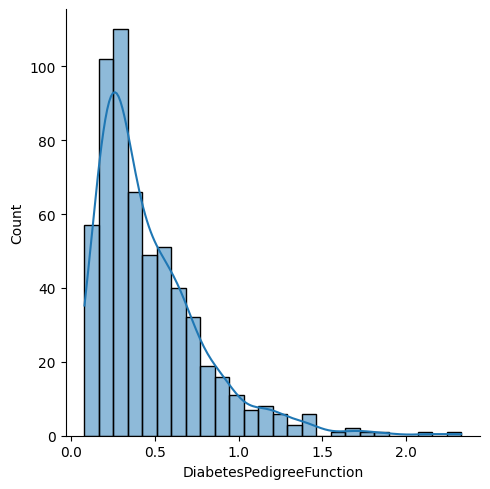

In [15]:
plot_information("DiabetesPedigreeFunction")

# Phase2: Preprocess
---

## Handle Missing Values:

#### replacing NAN values with mean:
it is a simple soloution to replacing NAN values with mean and it works totally fine.
but when missing values are more than expected, it can reduce std and variance a lot and our data wont be accurate anymore

#### completly deleting column containing missing values:
by doing this we guarantee that robust and highly accurate dataset
this methos is very usefull when that column doesnt give extra info for our furthur calculation 
and when missing values are a lot. 

in other hand by deleting whole column, we are losing some data that is inevitible. 

In [16]:
print(misising_rate)

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64


**DiabetesPedigreeFunction** has most misiing values with rate = 23%.

so we tend to delete that column and for others, replace nan values with mean or mod

In [17]:
# there are lotes of NAN values in "DiabetesPedigreeFunction" so we delete it completly
patients_info.drop("DiabetesPedigreeFunction", axis = 1, inplace = True)

# bloodPressure and Skin thikness have least corrolation with outcome so we delete them
patients_info.drop("BloodPressure", axis = 1, inplace = True)
patients_info.drop("SkinThickness", axis = 1, inplace = True)

# replace NAN values with average;
patients_info["Age"].fillna(patients_info["Age"].mean(), inplace = True)
patients_info["Glucose"].fillna(patients_info["Glucose"].mean(), inplace = True)
patients_info["Insulin"].fillna(patients_info["Insulin"].mean(), inplace = True)
patients_info["BMI"].fillna(patients_info["BMI"].mean(), inplace = True)

# replace NAN values with mod;
patients_info["Pregnancies"].fillna(patients_info["Pregnancies"].mode()[0], inplace=True)

In [18]:
patients_info.isna().sum()

Pregnancies    0
Glucose        0
Insulin        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [19]:
patients_info.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6.0,148.0,0.0,33.600000,50.0,1
1,1.0,85.0,0.0,26.600000,31.0,0
2,1.0,183.0,0.0,23.300000,32.0,1
3,1.0,89.0,94.0,28.100000,21.0,0
4,1.0,137.0,168.0,32.083626,33.0,1


## Normalization And Standardization:

**using scaling methods can dramatically increase your score on classification tasks, even when you hyperparameters are tuned. So, you should consider the scaling method as an important hyperparameter of your model.**


Normalization typically means rescales the values into a range of [0,1].It is useful when we don’t know about the distribution.

    X_new = (X - X_min)/(X_max - X_min)

Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).It is useful when the feature distribution is Normal or Gaussian.

    X_new = (X - mean)/Std

so we need scaling for better output in this project.
because most of our featurs are not normal disturbution, we choose Normalization. 

In [20]:
outcome = patients_info["Outcome"]
norm_patients_info = (patients_info - patients_info.mean(numeric_only = True)) / patients_info.std(numeric_only = True)
norm_patients_info["Outcome"] = outcome
norm_patients_info.head()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.823959,0.184772,-0.736140,0.205996,1.318879,1
1,-0.664983,-0.151877,-0.736140,-0.744937,-0.168925,0
2,-0.664983,0.371800,-0.736140,-1.193233,-0.090619,1
3,-0.664983,-0.130502,0.127491,-0.541165,-0.951979,0
4,-0.664983,0.125992,0.807370,0.000000,-0.012314,1


## Categorical features handling:

    Categorical variables are a challenge for Machine Learning algorithms. Since most (if not all) of them accept only numerical values as inputs, we need to transform the categories into numbers to use them in the model.


There are multiple methods to handle categorical features.  
1. __One-Hot encoding__: It creates another new feature column for each group.  
2. __Number encoding__: this is almost the easiest way, we map each category to a number.  
3. __Target encoding__: in this approach we sreplace a categorical value with the mean of the target variable.
4. __Frequency encoding__: this approach replaces each category with its frequency.  

because all variables are numerical in this database, we wont need categorical encoding.

## Data Splitting (Train, Test, Validation):


As mentioned in class, its importont not to look at test data while training.  


So we can split our data to train/test to handle this challenge, but again there is another problem  
training the hyperparameters on train data may cause highly optemisitic results so we break our data into three parts, train, test and validation.

we use validation data to find best hyperparameters for our machine.

The __P__ ratio depends on lots of metrics but two important metrics to mention are the number of rows in our data and our data itself.  
Assume that we have extremely small data in this situations small p may effect our learning accuracy.  
In larger datasets we can do the split with more confidence. somehow 60 20 20 may be a good rule of thumb but of course there is no general rule and it depends on our dataset.  

Train Test Split Using Sklearn
The train_test_split() method is used to split our data into train and test sets. 

First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.

A two-dimensional array with the inputs (x)
A one-dimensional array with the outputs (y)

In [21]:
x = norm_patients_info[norm_patients_info.columns.difference(["Outcome"])]
y = norm_patients_info["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size = 0.8)

# Phase3: Training
---

### Confusion Matrix:

In [22]:
def plot_confusion_matrix(actual_res, predicted_res, title = ""):
    confusion_matrix = metrics.confusion_matrix(actual_res, predicted_res)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    accurancy = int(metrics.accuracy_score(actual_res, predicted_res) * 100)
    cm_display.ax_.set_title(f"{title}--Accurancy:{accurancy}%")

## Decision Tree:

### Using Default Parameters:

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
train_prediction = classifier.predict(x_train)
test_prediction = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       105
           1       0.48      0.49      0.48        49

    accuracy                           0.67       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.67      0.67      0.67       154



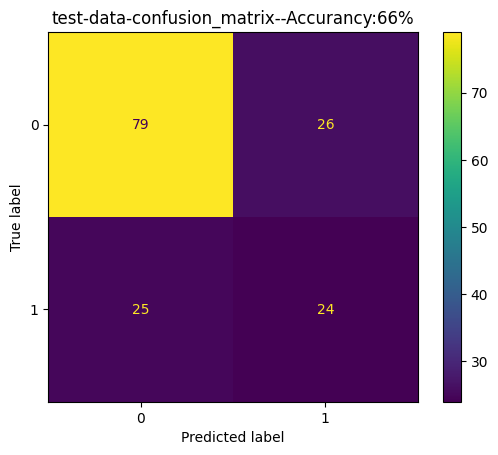

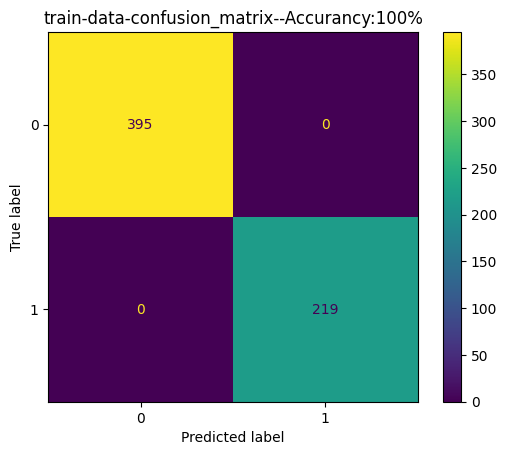

In [24]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

### Find best parameters using GridSearchCv:

In [25]:
parameters = dict(pca__n_components = list(range(1,x_train.shape[1]+1,1)),
                    dec_tree__criterion = ['gini', 'entropy'],
                    dec_tree__max_depth = [2,4,6,8,10,12])

pipe = Pipeline(steps=[('std_slc', StandardScaler()),
                        ('pca',  decomposition.PCA()),
                        ('dec_tree', tree.DecisionTreeClassifier())])

In [26]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5]})

In [27]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 5


In [28]:
classifier = DecisionTreeClassifier(criterion=clf_GS.best_estimator_.get_params()['dec_tree__criterion'],
                                    max_depth=clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
classifier.fit(x_train, y_train)
train_prediction = classifier.predict(x_train)
test_prediction = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       105
           1       0.53      0.63      0.57        49

    accuracy                           0.70       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.72      0.70      0.71       154



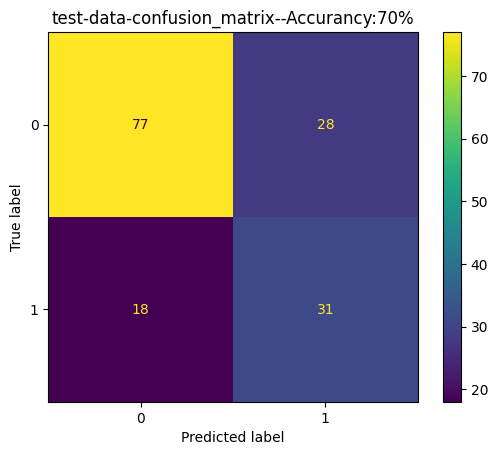

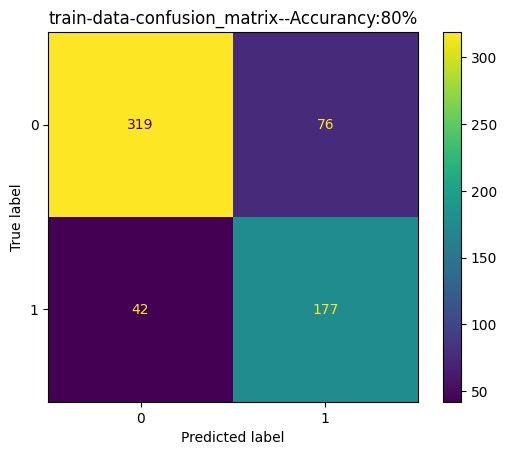

In [29]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

## K-Nearesst-Neighbours:

### Find best neghbors manually:

13


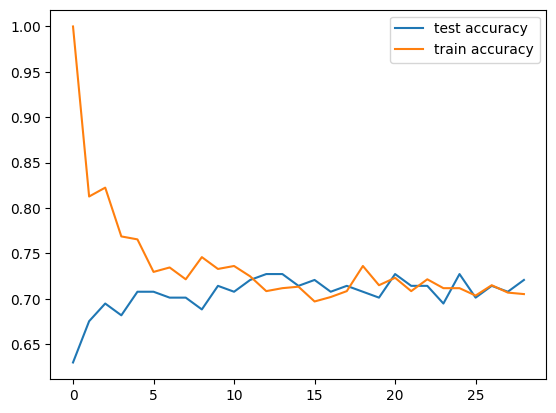

In [30]:
train_acc = []
test_acc = []
best = 0
best_i = 1
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, knn.predict(x_train)))
    tmp = metrics.accuracy_score(y_test, knn.predict(x_test))
    test_acc.append(tmp)
    if (best < tmp):
        best_i, best = i, tmp
print(best_i)
plt.plot(test_acc)
plt.plot(train_acc)
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

In [31]:
knn = KNeighborsClassifier(n_neighbors = best_i)
knn.fit(x_train, y_train)
train_prediction = knn.predict(x_train)
test_prediction = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       105
           1       0.59      0.47      0.52        49

    accuracy                           0.73       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.72      0.73      0.72       154



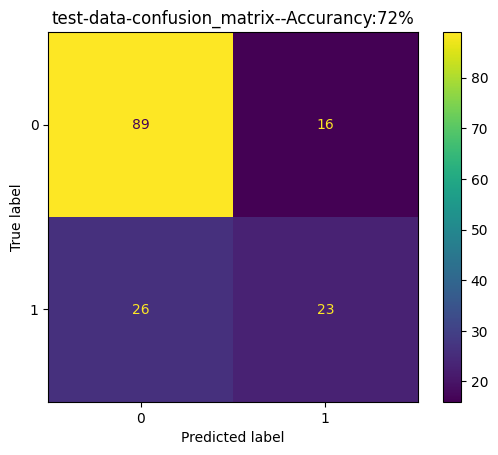

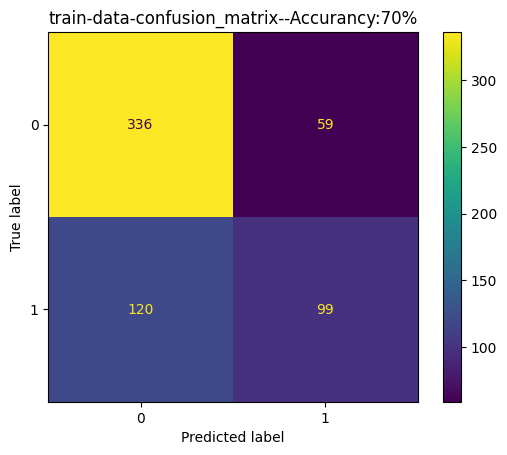

In [32]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

### Find best neghbors using GridSearchCv:

In [33]:
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors = list(range(1, 100)))
grid = GridSearchCV(knn, param_grid)
grid_search = grid.fit(x_test, y_test)
print(grid_search.best_params_)

{'n_neighbors': 7}


In [34]:
knn = KNeighborsClassifier(n_neighbors = grid_search.best_params_["n_neighbors"])
knn.fit(x_train, y_train)
train_prediction = knn.predict(x_train)
test_prediction = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.54      0.45      0.49        49

    accuracy                           0.70       154
   macro avg       0.65      0.63      0.64       154
weighted avg       0.69      0.70      0.69       154



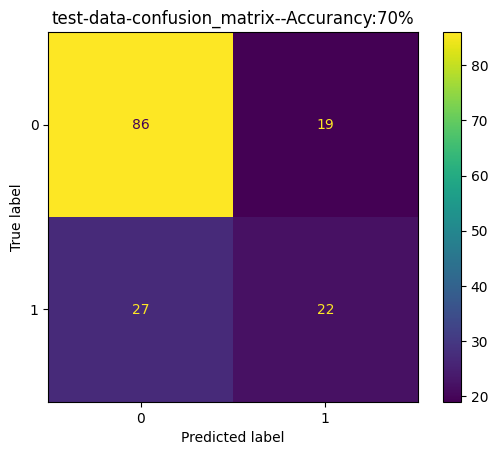

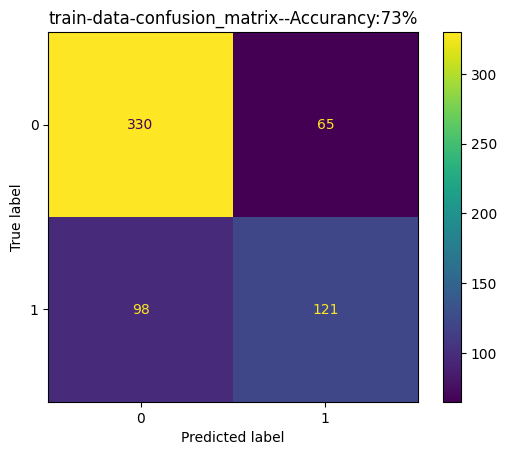

In [35]:
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

## Logistic Regression:

### Using Default Parameters:a

              precision    recall  f1-score   support

           0       0.79      0.95      0.87       105
           1       0.82      0.47      0.60        49

    accuracy                           0.80       154
   macro avg       0.81      0.71      0.73       154
weighted avg       0.80      0.80      0.78       154



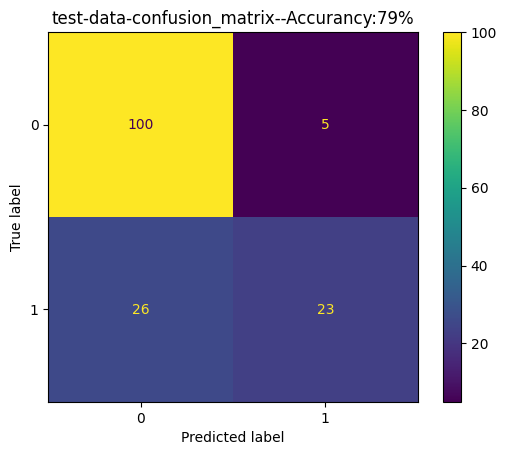

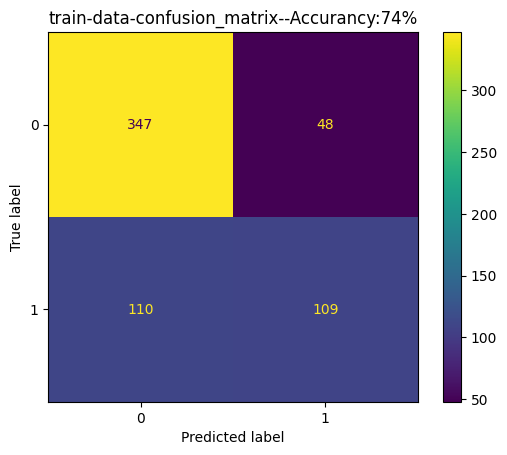

In [36]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
train_prediction = logreg.predict(x_train)
test_prediction = logreg.predict(x_test)
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

### Find best parameters using GridSearchCv:

In [37]:
parameters = {
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()

clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(x_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)

Tuned Hyperparameters : {'C': 100.0, 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.81      0.96      0.88       105
           1       0.86      0.51      0.64        49

    accuracy                           0.82       154
   macro avg       0.84      0.74      0.76       154
weighted avg       0.83      0.82      0.80       154



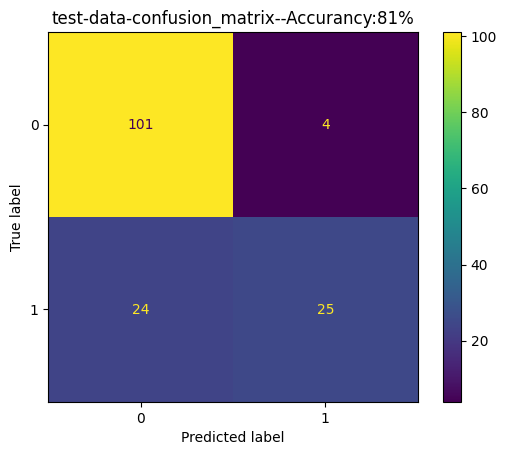

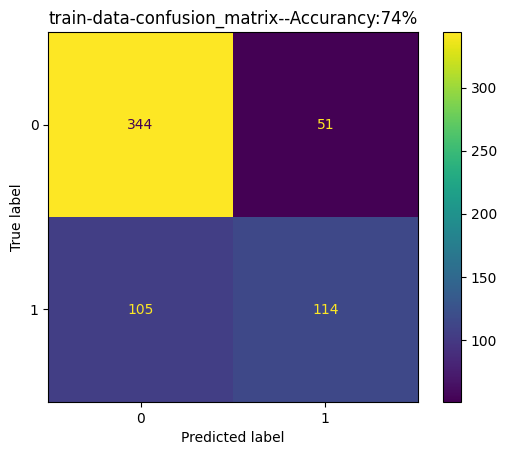

In [38]:
logreg = LogisticRegression(C = clf.best_params_["C"], solver = clf.best_params_["solver"])
logreg.fit(x_train, y_train)
train_prediction = logreg.predict(x_train)
test_prediction = logreg.predict(x_test)
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")

# Phase4: Random Forest
---

### Using Default Parameters:

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.66      0.51      0.57        49

    accuracy                           0.76       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



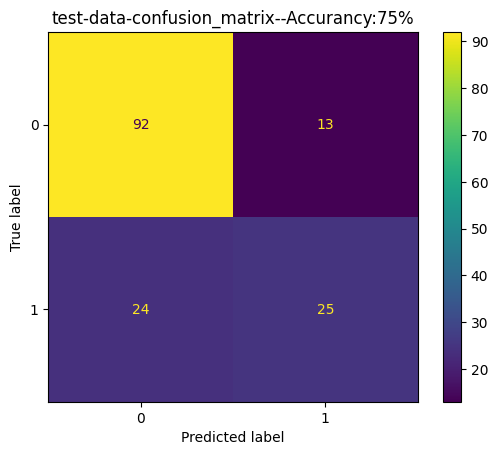

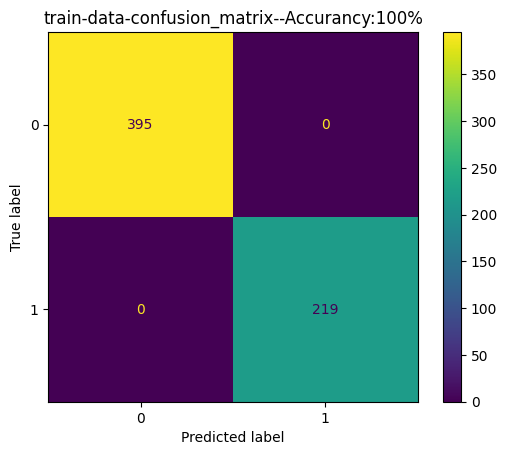

In [39]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
train_prediction = forest.predict(x_train)
test_prediction = forest.predict(x_test)
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")


### Find best parameters manually:

best_n_estimators:141


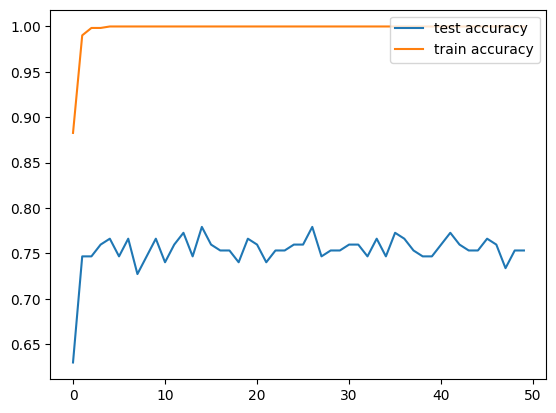

In [40]:
train_acc = []
test_acc = []
best = 0
best_n_estimators = 1

for i in range(1, 500, 10):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, forest.predict(x_train)))
    tmp = metrics.accuracy_score(y_test, forest.predict(x_test))
    test_acc.append(tmp)
    if (best < tmp):
        best_n_estimators, best = i, tmp

print(f"best_n_estimators:{best_n_estimators}")
plt.plot(test_acc)
plt.plot(train_acc)
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

best_max_depth:3


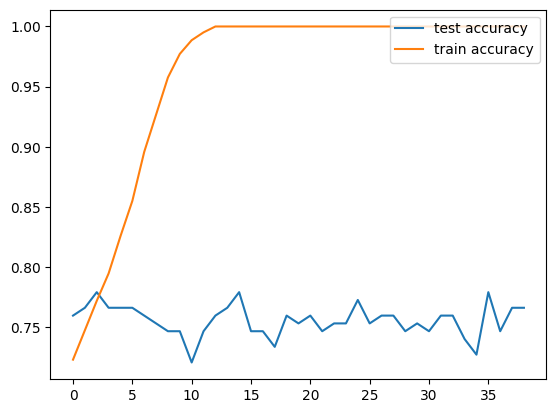

In [41]:
train_acc = []
test_acc = []
best = 0
best_max_depth = 1

for i in range(1, 40):
    forest = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = i)
    forest.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, forest.predict(x_train)))
    tmp = metrics.accuracy_score(y_test, forest.predict(x_test))
    test_acc.append(tmp)
    if (best < tmp):
        best_max_depth, best = i, tmp

print(f"best_max_depth:{best_max_depth}")
plt.plot(test_acc)
plt.plot(train_acc)
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

best_min_samples_leaf:1


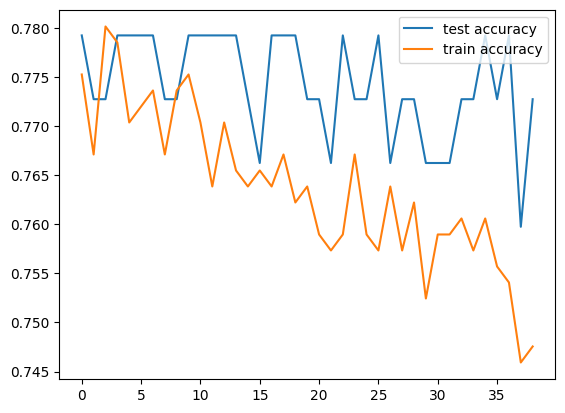

In [42]:
train_acc = []
test_acc = []
best = 0
best_min_samples_leaf = 1

for i in range(1, 40):
    forest = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_leaf = i)
    forest.fit(x_train, y_train)
    train_acc.append(metrics.accuracy_score(y_train, forest.predict(x_train)))
    tmp = metrics.accuracy_score(y_test, forest.predict(x_test))
    test_acc.append(tmp)
    if (best < tmp):
        best_min_samples_leaf, best = i, tmp

print(f"best_min_samples_leaf:{best_min_samples_leaf}")
plt.plot(test_acc)
plt.plot(train_acc)
plt.legend(["test accuracy", "train accuracy"], loc ="upper right")

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       105
           1       0.83      0.39      0.53        49

    accuracy                           0.78       154
   macro avg       0.80      0.67      0.69       154
weighted avg       0.79      0.78      0.75       154



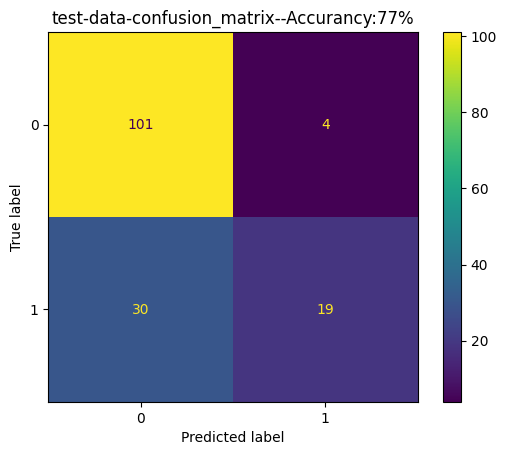

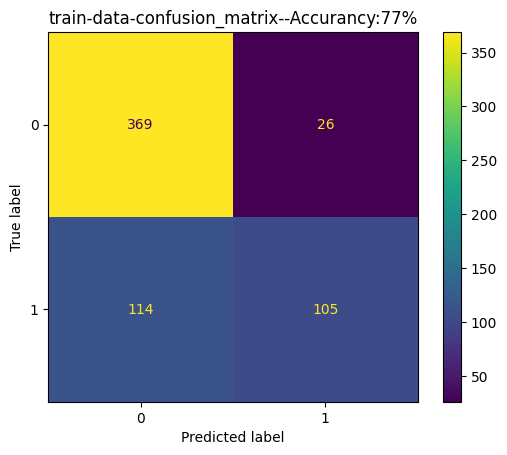

In [43]:
forest = RandomForestClassifier(n_estimators = best_n_estimators, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)
forest.fit(x_train, y_train)
train_prediction = forest.predict(x_train)
test_prediction = forest.predict(x_test)
print(metrics.classification_report(y_test, test_prediction))
plot_confusion_matrix(y_test, test_prediction, "test-data-confusion_matrix")
plot_confusion_matrix(y_train, train_prediction, "train-data-confusion_matrix")